In [1]:
%matplotlib widget
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter


from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

from sklearn.cluster import Birch                       
from sklearn.metrics import silhouette_score

### Single galaxy clustering

Functions


In [2]:
#functions for plotting pre clustering
def min_max(arrays):#finds min and max values from list of arrays
    maxes=[]
    mins=[]
    for array in arrays:
        maxes.append(np.max(array))
        mins.append(np.min(array))
    return max(maxes),min(mins)

def make_string(vel): # turns velocity values into strings, useful for plot labels
    string= str(vel[0])+ ' - '+str(vel[1])+ ' km/s '
    return string

def vis_mom0(array,wcs): #plots moment 0 maps with colourbar
    max,min = min_max(array)
    fig = plt.figure()
    fig.suptitle('Moment 0 Maps')
    
    fig.add_subplot(141,projection=wcs)
    im1=plt.imshow(array[0],vmin=min,vmax=max)
    plt.title(make_string(vels[0]))

    fig.add_subplot(142,projection=wcs)
    im2=plt.imshow(array[1],vmin=min,vmax=max)
    plt.title(make_string(vels[1]))

    fig.add_subplot(143,projection=wcs)
    im3=plt.imshow(array[2],vmin=min,vmax=max)
    plt.title(make_string(vels[2]))
    
    fig.add_subplot(144,projection=wcs)
    im4=plt.imshow(array[3],vmin=min,vmax=max)
    plt.title(make_string(vels[3]))

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = plt.colorbar(im1,cax=cbar_ax)
    cbar.set_label('K km/s')
    plt.show()

def vis_mom1(array,wcs):#plots moment 1 maps with colourbar for each map
    fig = plt.figure()
    fig.suptitle('Moment 1 Maps')
    
    fig.add_subplot(141,projection=wcs)
    im1=plt.imshow(array[0],vmin=300,vmax=2300)
    plt.title(make_string(vels[0]))
    cbar=plt.colorbar()
    cbar.formatter = ScalarFormatter(useMathText=False)
    cbar.ax.set_ylabel('km/s')
    cbar.update_ticks()

    fig.add_subplot(142,projection=wcs)
    im2=plt.imshow(array[1],vmin=2300,vmax=4300)
    plt.title(make_string(vels[1]))
    cbar=plt.colorbar()
    cbar.formatter = ScalarFormatter(useMathText=False)
    cbar.ax.set_ylabel('km/s')
    cbar.update_ticks()

    fig.add_subplot(143,projection=wcs)
    im3=plt.imshow(array[2],vmin=4300,vmax=6300)
    plt.title(make_string(vels[2]))
    cbar=plt.colorbar()
    cbar.formatter = ScalarFormatter(useMathText=False)
    cbar.ax.set_ylabel('km/s')
    cbar.update_ticks()

    fig.add_subplot(144,projection=wcs)
    im4=plt.imshow(array[3],vmin=6300,vmax=8300)
    plt.title(make_string(vels[3]))
    cbar=plt.colorbar()
    cbar.formatter = ScalarFormatter(useMathText=False)
    cbar.ax.set_ylabel('km/s')
    cbar.update_ticks()

    plt.show()

def vis_mom2(array,wcs):
    max=2000
    min= 0
    fig = plt.figure()
    fig.suptitle('Moment 2 Maps')
    
    fig.add_subplot(141,projection=wcs)
    im1=plt.imshow(array[0],vmin=min,vmax=max)
    plt.title(make_string(vels[0]))

    fig.add_subplot(142,projection=wcs)
    im2=plt.imshow(array[1],vmin=min,vmax=max)
    plt.title(make_string(vels[1]))

    fig.add_subplot(143,projection=wcs)
    im3=plt.imshow(array[2],vmin=min,vmax=max)
    plt.title(make_string(vels[2]))
    
    fig.add_subplot(144,projection=wcs)
    im4=plt.imshow(array[3],vmin=min,vmax=max)
    plt.title(make_string(vels[3]))

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = plt.colorbar(im1,cax=cbar_ax)
    cbar.set_label('km/s')
    plt.show()

def plot_filtered(m0,m1,m2,chunk):
    fig = plt.figure()
    fig.suptitle('Masked Moment Maps')
        
    fig.add_subplot(131,projection=wcs)
    im1=plt.imshow(m0)
    plt.title('M0')
    cbar=plt.colorbar()
    cbar.formatter = ScalarFormatter(useMathText=False)
    cbar.ax.set_ylabel('K km/s')
    cbar.update_ticks()

    fig.add_subplot(132,projection=wcs)
    im2=plt.imshow(m1,vmin=vels[chunk][0],vmax=vels[chunk][1])
    plt.title('M1')
    cbar=plt.colorbar()
    cbar.formatter = ScalarFormatter(useMathText=False)
    cbar.ax.set_ylabel('km/s')
    cbar.update_ticks()

    fig.add_subplot(133,projection=wcs)
    im3=plt.imshow(m2,vmin=0,vmax=2000)
    plt.title('M2')
    cbar=plt.colorbar()
    cbar.formatter = ScalarFormatter(useMathText=False)
    cbar.ax.set_ylabel('km/s')
    cbar.update_ticks()
    plt.show()
    
def scatter_maps(m0,m1,m2,z=False):
    plt.figure()
    plt.scatter(m1,m0,c=m2,s=0.6)
    plt.xlabel('Vel km/s')
    plt.ylabel('Intensity K km/s')
    if z==True:   #display z axis
        plt.colorbar(label='Velocity dispersion [km/s]')
        plt.scatter(m1,m0,c=m2,s=0.6)
    else:#displays clusters on z axis
        cmap = plt.cm.jet
        norm = mpl.colors.BoundaryNorm(np.arange(np.nanmin(m2),np.nanmax(m2)+2,1),cmap.N)
        plt.scatter(m1,m0,c=m2,s=0.6,cmap=cmap,norm=norm)
        plt.colorbar(ticks=np.arange(np.nanmin(m2),np.nanmax(m2)+2,1))
    plt.show()

#Clustering Functions
def reconstruct(data, labels, reshape=True):
    """ Reconstructs the clustering labels to be of shape 75,61. If reshape=False, return a flattened array instead"""
    if (len(data.flatten())-len(labels)) != np.sum(np.isnan(data.flatten())):
        raise ValueError("Dimensions do not match")
    ret = []
    for i in data.flatten():
        if np.isnan(i):
            ret.append(np.nan)
        else:
            first, labels = labels[0], labels[1:]
            ret.append(first)
    if reshape:
        return np.array(ret).reshape(np.shape(data)[0],np.shape(data)[1])
    return ret

def SI_plot(index,score):
    plt.figure()
    plt.scatter(index,score,color='k',s=0.7)
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    plt.title('silhouette index')
    plt.show()

def run_clustering(m0,m1,m2,clusters):
#runs clustering for optiomal number of clusters
    ClusterLabels = getCluster((m0, m1,m2), threshold=0.1, n_clusters=clusters)
    ClusterLabels_ = reconstruct(m0, ClusterLabels) 
    scatter_maps(m0,m1,ClusterLabels_)

    return ClusterLabels,ClusterLabels_

def SI_analysis(m0,m1,m2,num_range):
    scores = []
    index = []
    for i in range(num_range[0],num_range[1]):
        labs, Y = getCluster((m0, m1,m2), threshold=0.1, n_clusters=i, getData=True)
        scores.append(silhouette_score(Y, labs))
        index.append(i)

    SI_plot(index,scores)
    
def getCluster(datas, threshold=0.5, n_clusters=None, getData=False, branching_factor=50):
    X = []
    if isinstance(datas, tuple):#check if input data is a tuple
        for i in range(len(datas)):#flatten elements of the tuple and remove NaN values
            X.append( ((datas[i])[~np.isnan(datas[i])]).flatten() )
        Y = np.array(X)#convert to array
        Y = Y.T#transpose for clustering
        #run Birch clustering
        brc = Birch(n_clusters=n_clusters, threshold=threshold, branching_factor=branching_factor).fit(Y)
        labels = brc.predict(Y)#predict cluster labels
        if getData:
            return labels, Y#return labels and data
        return labels#return just labels
    raise ValueError("Input must be of type Tuple. Try to pass it as (x, y, ...) ")

def Scatter2DHighlight(x, y, c=None, title=None, xlabel="", ylabel="", clabel="",  cref=None ):
    """ 2D scatter plot highlighting a specified part. Input it as x: ([all data], [data to highlight]) """
    # fig = plt.figure()
    fig, ax = plt.subplots(figsize=(7.5,6))
    plt.scatter(x[0].flatten(), y[0].flatten(), s=1, c='#CCC', alpha=0.8)
    sc = plt.scatter(x[1], y[1], s=1, vmin=np.min(cref) if cref is not None else None, vmax=np.max(cref) if cref is not None else None, c='blue' if c is None else c)
    plt.xlabel(r"%s" % xlabel)
    plt.ylabel(r"%s" % ylabel)
    if title is not None:
        plt.title(r"%s" % title)
    if isinstance(c, (list, np.ndarray)):
        cbar = plt.colorbar(sc)
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel(r"%s" % clabel, rotation=90)

def single_cluster_scatter(m0,m1,cluster_labs,cluster_no):
#plots scatter plot with single cluster highlighted
    highlight_m0 = m0.flatten()[~np.isnan(m0.flatten())]
    highlight_m1 = m1.flatten()[~np.isnan(m1.flatten())]
    highlight_m0 = np.where(cluster_labs!=cluster_no, np.nan, highlight_m0)#change this number to change which chunk highlighted.
    highlight_m1 = np.where(np.isnan(highlight_m0), np.nan, highlight_m1)
    Scatter2DHighlight(
        (m1.flatten()[~np.isnan(m1.flatten())], highlight_m1),
        (m0.flatten()[~np.isnan(m0.flatten())], highlight_m0),
        c = 'red',
        xlabel='vel km/s',
        ylabel='Intensity K km/s' )
    
imkw = dict( origin='lower', interpolation='None')

def WorldMap_stitched(data, cmap="viridis", title=None, clabel=None, contour=None, vmin=None, vmax=None, linewidth=1):
    """ Takes an array of datasets [x, y, ...] and plots each dataset individually in WCS coordinates.
    To get contours, input it as contour=([all clusterlabels], [labels to highlight], [colors or getColors(all labels)])"""
    size = len(data)
    fig = plt.figure()

    for i in range(1,size+1,1):
        ax = fig.add_subplot( int((size+1)/2), 1 if size==1 else 2, i)
        #ax.coords
        im = ax.imshow(data[i-1], cmap = cmap, vmin=vmin, vmax=vmax ,  **imkw)
        
        if isinstance(contour, tuple):
            if isinstance(contour[1], (list, np.ndarray)):
                labs = list(set((contour[1])[~np.isnan(contour[1])]))
                for j in range(len(labs)):
                    lev = np.where(contour[0] == labs[j], labs[j], -1 )
                    ax.contour(lev, colors=('%s' % contour[2][j]) if isinstance(contour[2][j], str) else 
                        ("#%02X%02X%02X%02X" % ( int(contour[2][j][0]*255), int(contour[2][j][1]*255), int(contour[2][j][2]*255), int(contour[2][j][3]*255))),
                        alpha=0.5, linewidths=linewidth)
            if isinstance(contour[1], (int, float, complex)):
                lev = np.where(contour[0]==contour[1], contour[1], -1)
                ax.contour(lev, colors=('white') if len(contour)<3 else
                    "#%02X%02X%02X%02X" % ( int(contour[2][0]*255), int(contour[2][1]*255), int(contour[2][2]*255), int(contour[2][3]*255)),
                    alpha=0.5, linewidths=linewidth)
        ax.grid()
        if isinstance(title, str):
            ax.set_title(r"%s" % title)
        if isinstance(title, (list)):
            ax.set_title(r"%s" % title[i-1])
        cbar = plt.colorbar(im, ax=ax)
        if isinstance(clabel, list):
            cbar.ax.get_yaxis().labelpad = 10
            cbar.ax.set_ylabel(r'%s' % clabel[i-1], rotation=90)
        if isinstance(clabel, str):
            cbar.ax.get_yaxis().labelpad = 10
            cbar.ax.set_ylabel(r'%s' % clabel, rotation=90)
          
class MplColorHelper:
  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

def getColors(labels, cmap_name="jet", convertHex = False):
    lab = list(set(labels[~np.isnan(labels)]))
    low = np.min(lab)
    high= np.max(lab)
    col = MplColorHelper(cmap_name, low, high)
    if convertHex:
        c = col.get_rgb(lab)
        return ["#%02X%02X%02X%02X" % ( int(c[i][0]*255), int(c[i][1]*255), int(c[i][2]*255), int(c[i][3]*255)) for i in range(len(c))]
    return col.get_rgb(lab)

Get maps.

In [3]:
vels = [[300,2300],[2300,4300],[4300,6300],[6300,8300]]#velocity chunks

#import moment maps
c0_m0,c0_m0_h = fits.getdata('gal_cube\chunk0_m0.fits',header=True)
wcs=WCS(c0_m0_h)#only need one wcs, same for all maps
wcs = wcs.dropaxis(2)

c1_m0 = fits.getdata('gal_cube\chunk1_m0.fits')
c2_m0 = fits.getdata('gal_cube\chunk2_m0.fits')
c3_m0 = fits.getdata('gal_cube\chunk3_m0.fits')

c0_m1 = fits.getdata('gal_cube\chunk0_m1.fits')
c1_m1 = fits.getdata('gal_cube\chunk1_m1.fits')
c2_m1 = fits.getdata('gal_cube\chunk2_m1.fits')
c3_m1 = fits.getdata('gal_cube\chunk3_m1.fits')

c0_m2 = fits.getdata('gal_cube\chunk0_m2.fits')
c1_m2 = fits.getdata('gal_cube\chunk1_m2.fits')
c2_m2 = fits.getdata('gal_cube\chunk2_m2.fits')
c3_m2 = fits.getdata('gal_cube\chunk3_m2.fits')

m0s = [c0_m0[0],c1_m0[0],c2_m0[0],c3_m0[0]]#combine maps
m1s = [c0_m1[0],c1_m1[0],c2_m1[0],c3_m1[0]]
m2s = [c0_m2[0],c1_m2[0],c2_m2[0],c3_m2[0]]

Set OBSGEO-B to    50.524830 from OBSGEO-[XYZ].
Set OBSGEO-H to      413.695 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Plot moment maps.

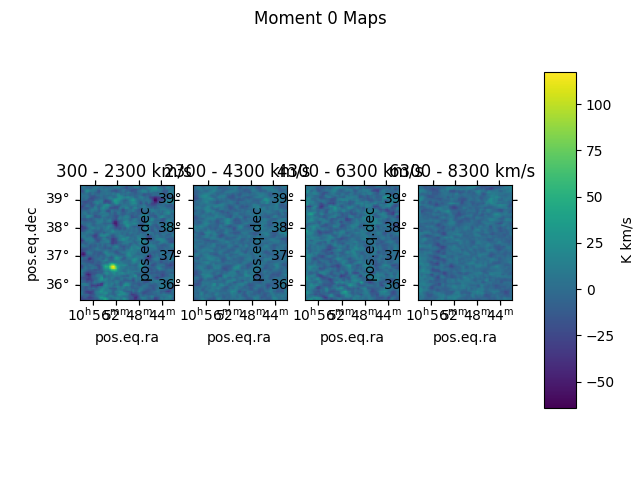

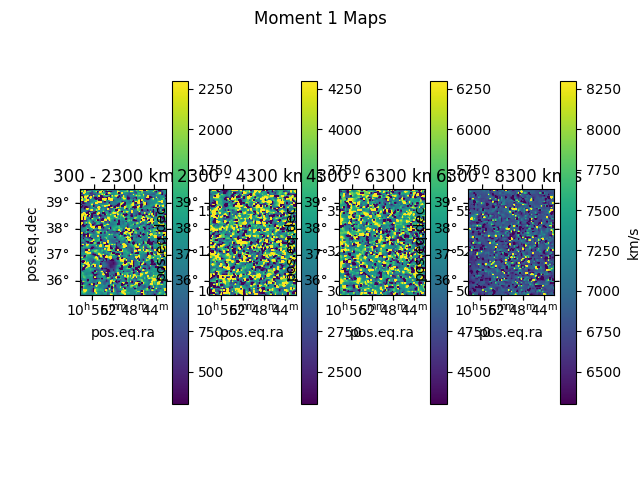

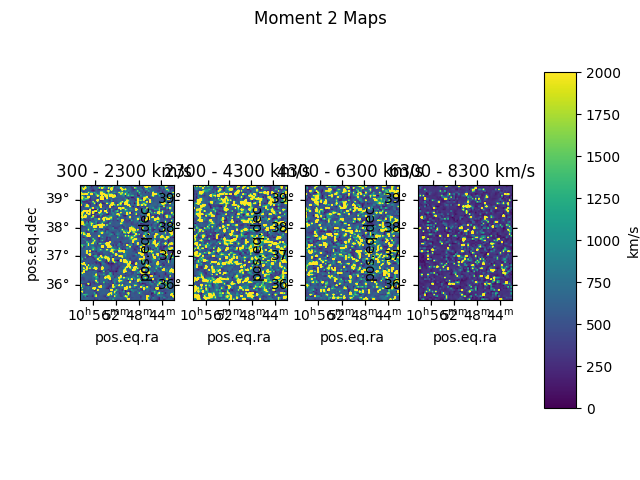

In [4]:
vis_mom0(m0s,wcs)
vis_mom1(m1s,wcs)
vis_mom2(m2s,wcs)

Create masked moment maps.


In [5]:
#create masked mom maps
m0f=[]
m1f=[]
m2f=[]
for i in range(len(vels)):
    m1filt = np.where((m1s[i] < vels[i][0]) | (m1s[i] > vels[i][1]) | (m2s[i]<0)| (m2s[i]>2000), np.nan, m1s[i])
    m2filt = np.where(np.isnan(m1filt),np.nan, m2s[i])
    m0filt = np.where(np.isnan(m1filt),np.nan, m0s[i])

    m0f.append(m0filt)
    m1f.append(m1filt)
    m2f.append(m2filt)
#stitch masked maps together
all_m0 = np.hstack(m0f)
all_m1 = np.hstack(m1f)
all_m2 = np.hstack(m2f)

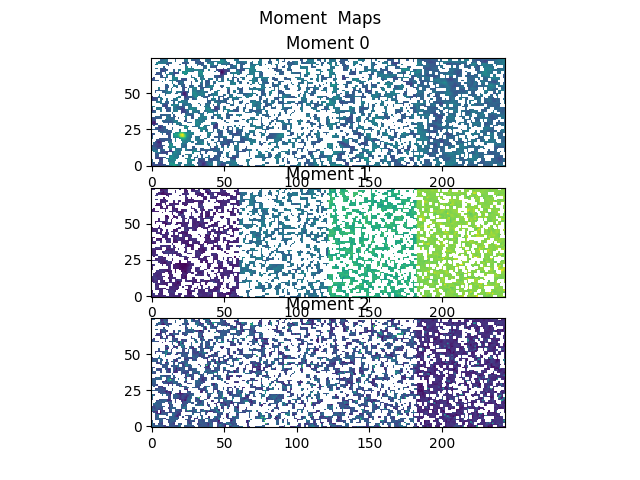

In [6]:
#plot masked stitched moment maps
fig = plt.figure()
fig.suptitle('Moment  Maps')   
fig.add_subplot(311)
im1=plt.imshow(all_m0,origin='lower')
plt.title('Moment 0')
fig.add_subplot(312)
im2=plt.imshow(all_m1,origin='lower')
plt.title('Moment 1')
fig.add_subplot(313)
im3=plt.imshow(all_m2,origin='lower')
plt.title('Moment 2')
plt.show()

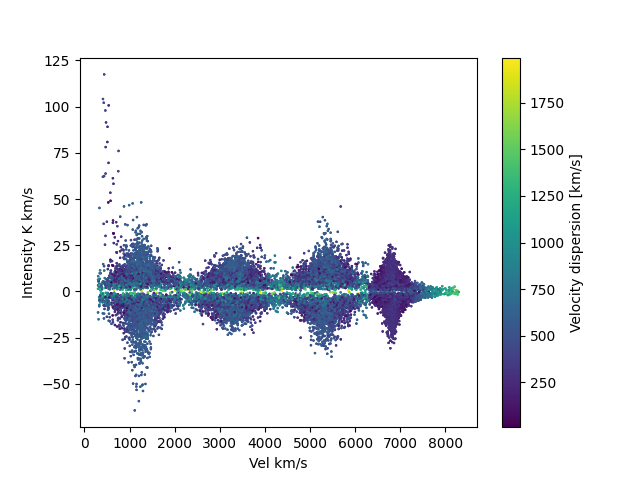

In [7]:
scatter_maps(all_m0,all_m1,all_m2,z=True)

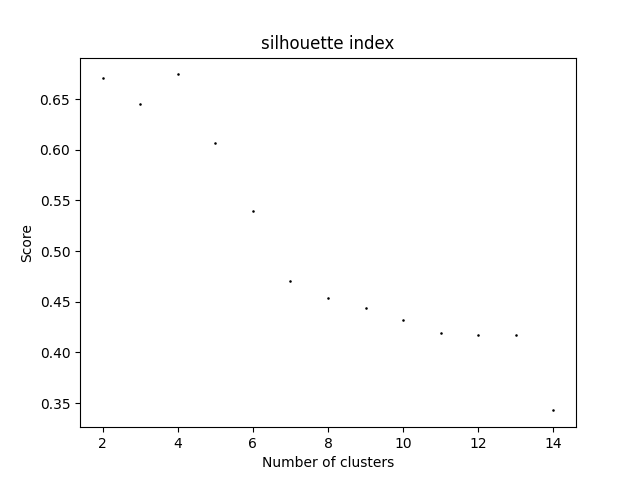

In [8]:
SI_analysis(all_m0,all_m1,all_m2,[2,15])

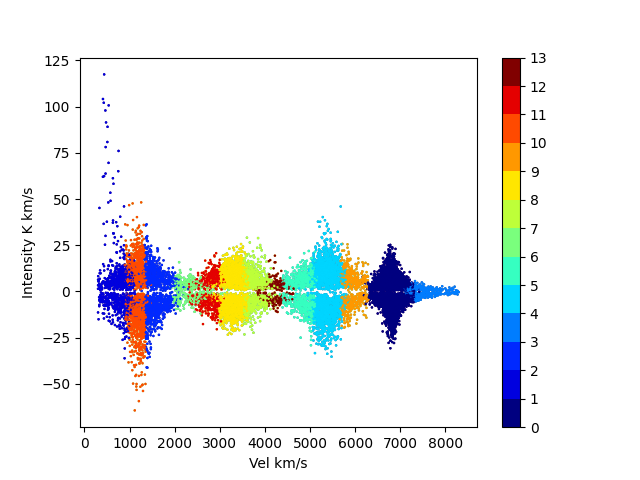

In [9]:
ClusterLabels,ClusterLabels_ = run_clustering(all_m0,all_m1,all_m2,13)

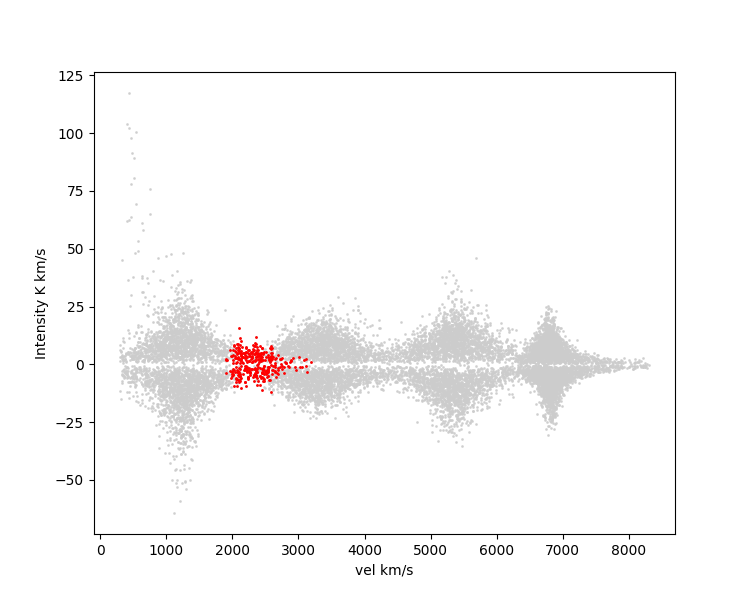

In [10]:
single_cluster_scatter(all_m0,all_m1,ClusterLabels,6)

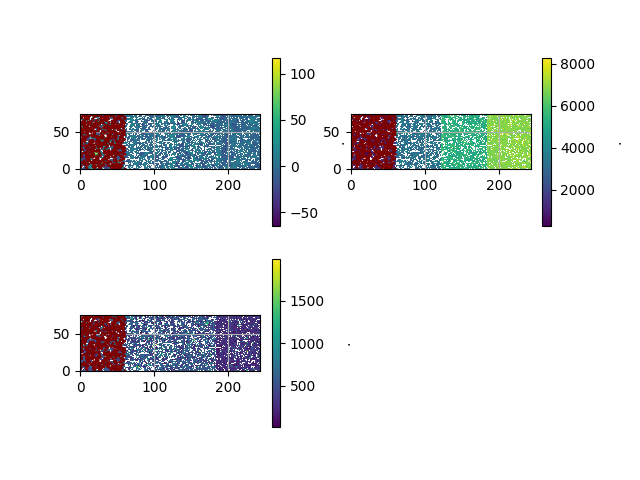

In [11]:
WorldMap_stitched([all_m0,all_m1,all_m2], contour=(ClusterLabels_, 1, getColors(ClusterLabels, 'jet_r')[0]), clabel = '.')

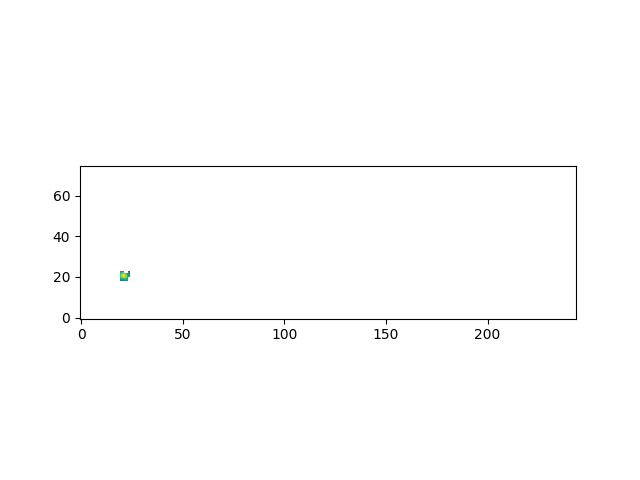

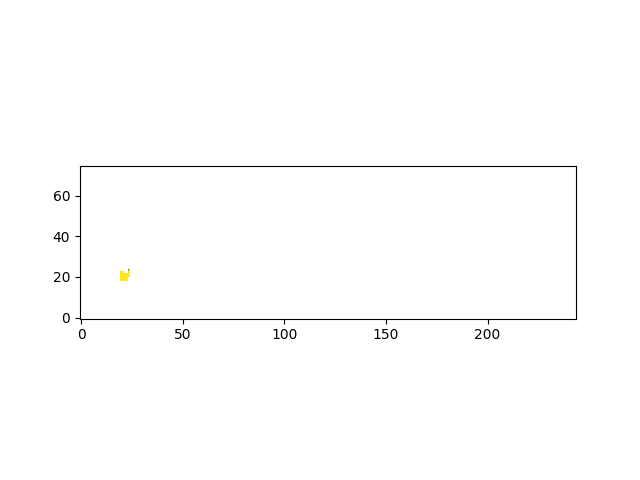

In [12]:
def make_mask(ClusterLabels_,cluster_no):

    gal_cluster_mask = np.where(ClusterLabels_!=cluster_no,np.nan, ClusterLabels_)#change this to chopose which cluster. Turns every non cluster pixel to nan
    gal_cluster_mask2 = np.where(gal_cluster_mask==0,1,gal_cluster_mask)#changes every cluster pix to 1. change number to select for cluster
    gal_cluster_mask3= np.nan_to_num(gal_cluster_mask2,nan=0)#changes every nan to 0
    return gal_cluster_mask3

cluster_mask = make_mask(ClusterLabels_,1)

def mask_m0(m0,cluster_mask,num_neighbours):

    #create array showing neighbor sum.
    result_array = np.zeros_like(cluster_mask)
    for i in range(np.shape(m0)[0]):
        for j in range(np.shape(m0)[1]):
            neighbors_sum = np.sum(cluster_mask[max(0, i-1):min(np.shape(m0)[0], i+2), max(0, j-1):min(np.shape(m0)[1], j+2)])
            result_array[i, j] = neighbors_sum

    neighbor_mask = np.where((result_array==np.nan)|(result_array<=num_neighbours),np.nan,cluster_mask)
    masked_m0 = np.where((result_array==np.nan)|(result_array<=num_neighbours),np.nan,m0)
    plt.figure()
    plt.imshow(masked_m0,origin='lower')#change vmin to min number of neighbours
    plt.show()
    plt.figure()
    plt.imshow(neighbor_mask,origin='lower')#change vmin to min number of neighbours
    plt.show()

    return neighbor_mask


neighbor_mask =mask_m0(all_m0,cluster_mask,6)

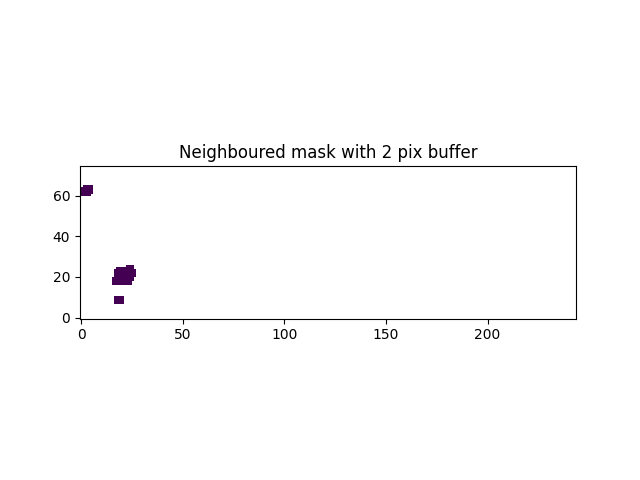

In [13]:
def buffer_pix(input_mask,m0):
    new_mask = np.copy(input_mask)
    mask = input_mask
    
    offsets = [
        (0, 0), (1, 0), (-1, 0), (0, 1), (0, -1),
        (1, 1), (1, -1), (-1, 1), (-1, -1),
        (2, 1), (-2, 1), (1, 2), (1, -2),
        (2, -1), (-2, -1), (-1, 2), (-1, -2),
        (2, 0), (-2, 0), (0, 2), (0, -2),
        (2, 2), (2, -2), (-2, 2), (-2, -2)
    ]
    
    for i in range(1, np.shape(mask)[0]-2):
        for j in range(1, np.shape(mask)[1]-2):
            if mask[i, j] == 1:
                for offset_i, offset_j in offsets:
                    new_i, new_j = i + offset_i, j + offset_j
                    new_mask[new_i, new_j] = 1

    return new_mask


mask = buffer_pix(neighbor_mask,all_m0)
plt.figure()
plt.title('Neighboured mask with 2 pix buffer')
plt.imshow(mask,origin='lower')#change vmin to min number of neighbours
plt.show()

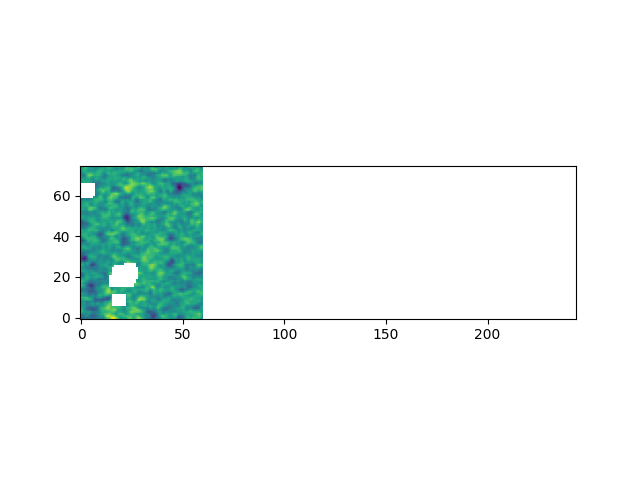

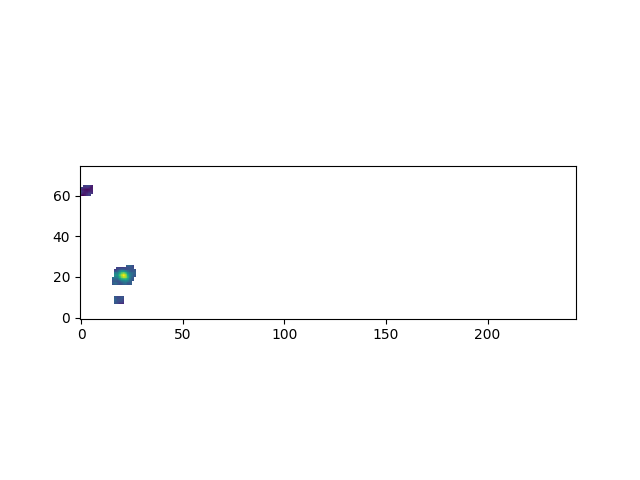

1.2762182943363884
Flux=  260.57523918038044  Jy


In [14]:

def unit_conversion(temp):
    flux_jy = temp/1.28
    flux_BA = flux_jy/8.64
    return flux_BA

def flux_calc(moment_0s,buffered_mask):
    #stitch m0s
    stitch_m0 = np.hstack(moment_0s)
    gal_only_m0 = np.hstack([moment_0s[0],np.full((75,61),np.nan),np.full((75,61),np.nan),np.full((75,61),np.nan)])

    #apply mask
    stitch_m0_masked = np.where(buffered_mask!=1,np.nan,stitch_m0)
    inverse_masked_m0 = np.where((buffered_mask==1),np.nan,gal_only_m0)
    #inverse_masked_m0 = np.where((buffered_mask==1)|(gal_only_m0<=0),np.nan,gal_only_m0)
    
    plt.figure()
    plt.imshow(inverse_masked_m0,origin='lower')
    plt.show()
    plt.figure()
    plt.imshow(stitch_m0_masked,origin='lower')
    plt.show()
    #calculate background
    bg_per_pix =np.absolute(np.nanmean(inverse_masked_m0))
    print(bg_per_pix)

    gal_pix =np.sum(~np.isnan(stitch_m0_masked))

    clean_gal_flux = unit_conversion(np.nansum(stitch_m0_masked)-bg_per_pix*gal_pix)
    print('Flux= ', clean_gal_flux, ' Jy')

    return stitch_m0_masked, clean_gal_flux

stitch_m0_masked,flux= flux_calc(m0s,mask)
    